In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


# Task 1: Data Understanding

In this project, we use the Indian Liver Patient Dataset (ILPD), originally available from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

## Dataset Overview:
- Instances: 583 patient records (before class balancing), with each row representing an individual patient.

- Features: 10 clinical and demographic attributes, including:

    Age, Gender

    Total_Bilirubin, Direct_Bilirubin

    Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase

    Total_Protiens, Albumin, Albumin_and_Globulin_Ratio

- Target Variable:

    Originally labeled as Dataset (1 = liver disease, 2 = no liver disease)

    We renamed and encoded this into a binary column Target (1 = liver disease, 0 = healthy)

Note: A balanced version of the dataset was created for this project to address class imbalance, improving fairness and model performance.

## Prediction Task:
The goal of this project is to build a binary classification model that predicts whether a patient is likely to have liver disease based on their clinical measurements. This model can support early screening and assist healthcare providers in making informed decisions.

In [3]:
# Load dataset
df = pd.read_csv("indian_liver_patient_balanced.csv")

In [4]:
# Basic Exploration
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,30,Male,0.8,0.2,182,46,57,7.8,4.3,1.2,0
1,13,Male,0.6,0.1,320,28,56,7.2,3.6,1.0,0
2,12,Male,1.0,0.2,719,157,108,7.2,3.7,1.0,1
3,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.0,0
4,26,Male,1.3,0.4,173,38,62,8.0,4.0,1.0,1


Here, we begin the process of machine learning by loading and exploring the dataset. The dataset used here is indian_liver_patient_balanced.csv, which is a class-balanced version of the original Indian Liver Patient Dataset. It consists of patient medical histories of patients with or without liver disease.

The .head() method is called in order to see the first five rows of the data set, which helps us to easily inspect the data structure and contents. Some of them are demographic and biochemical characteristics such as:

- Age: Age of the patient

- Gender: Gender of the patient

- Total_Bilirubin & Direct_Bilirubin: Liver function indicators

- Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase: Liver enzymes to check liver inflammation or damage

Total_Protiens, Albumin, Albumin_and_Globulin_Ratio: Protein synthesis and efficiency indicators of the liver

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    object 
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
 10  Target                      832 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 71.6+ KB


info() function helps to produce the result that shows the data type of columns

In [6]:
print(df.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  832.000000       832.000000        832.000000            832.000000   
mean    44.112981         2.682692          1.170433            266.007212   
std     16.232567         5.318176          2.419320            221.094069   
min      4.000000         0.400000          0.100000             63.000000   
25%     32.000000         0.700000          0.200000            166.750000   
50%     45.000000         0.900000          0.300000            196.500000   
75%     57.000000         2.000000          0.900000            275.250000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                832.000000                  832.000000      832.000000   
mean                  67.384615                   90.656250        6.479207   
std                  154.783506                  244.373798 

.describe() funtion shows the mathematical results such as Mean, Median, Distribution, AVG of the numeric features in the dataset

In [7]:
# Encode gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In this step, we convert the categorical 'Gender' column into a numerical format using scikit-learn’s LabelEncoder

This conversion is necessary because the majority of machine learning algorithms require numerical input features.

The LabelEncoder gives each unique categorical value an integer.

Here, it likely maps:

"Male" → 1

"Female" → 0

(or vice versa, depending on alphabetical order)

This simple encoding is adequate for binary classes like gender. In the event of more than two classes (like for country or diagnosis type), one-hot encoding or other strategies might be superior.

In [8]:
# Check for missing values
missing_vals = df.isnull().sum()
print("Missing Values:\n", missing_vals)

Missing Values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


In the above step, `isnull.sum()` function tells us the count of null values in the columns. In our dataset there are no nan values or missing values

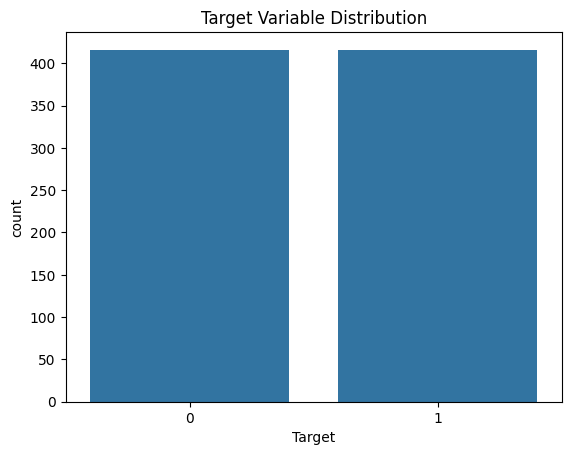

In [9]:
# Countplots
sns.countplot(x='Target', data=df)
plt.title('Target Variable Distribution')
plt.show()

The above fig describes an even distribution of the Target variable of our data set

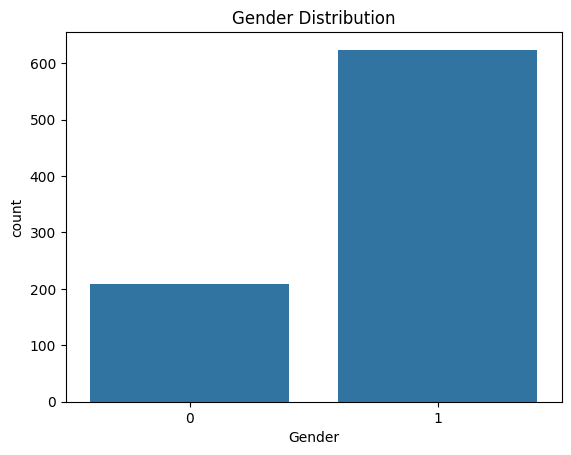

In [10]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

Gender distribution shows that Males(1) have higher count than females(0) with figures 600 to 200 respectively

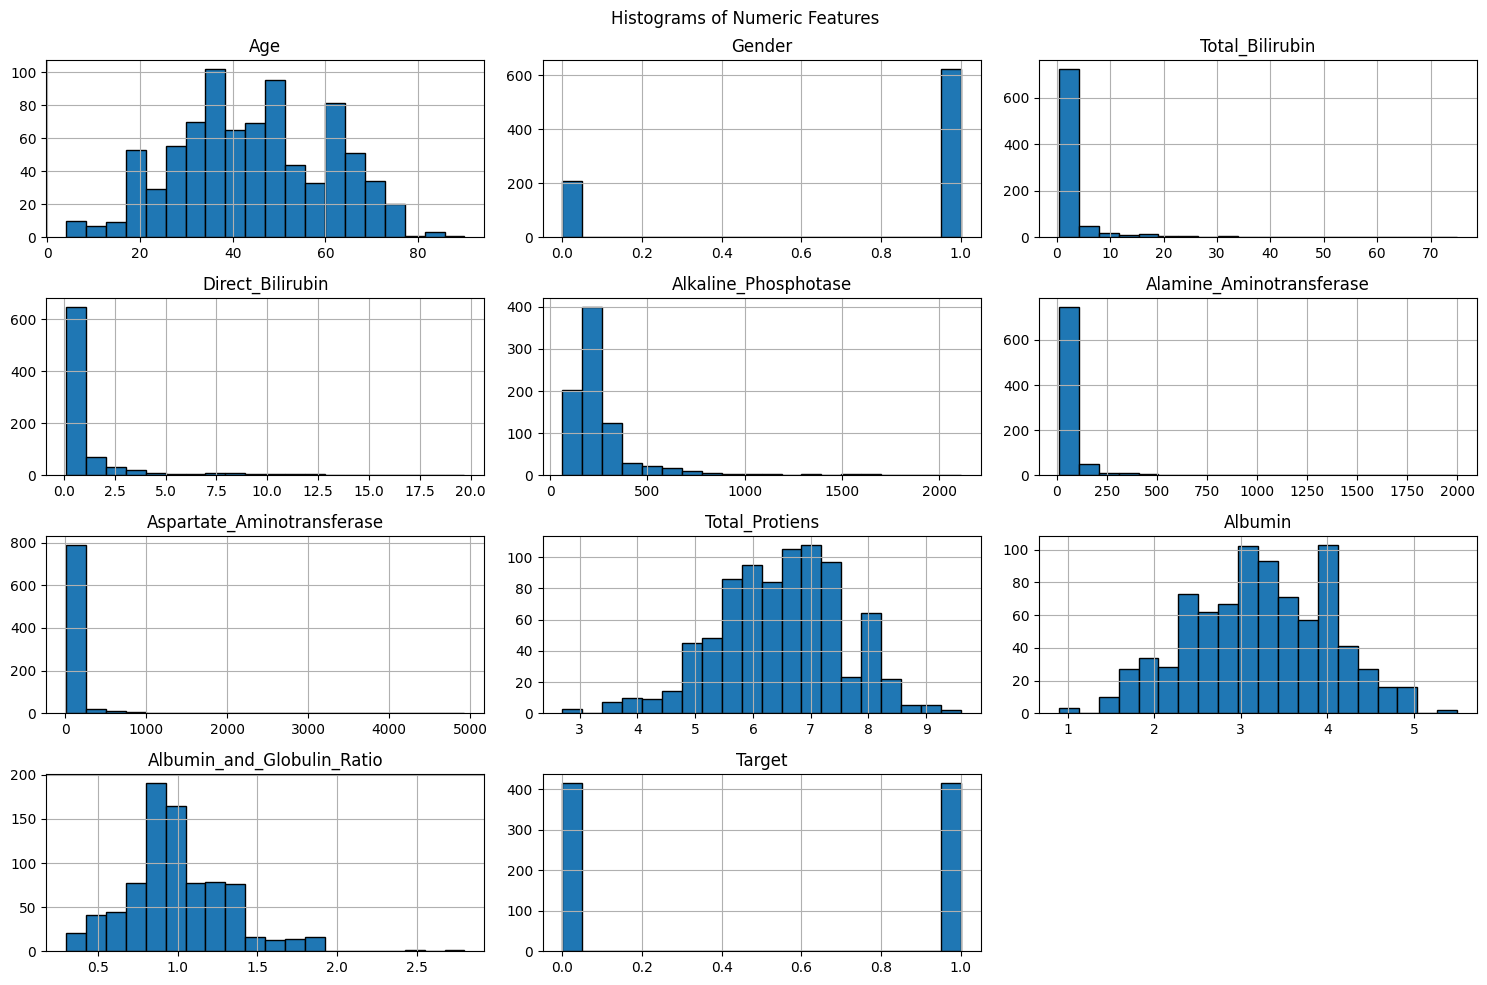

In [11]:
# Histograms
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

To have an idea about how each numeric feature of our dataset is distributed, we plotted histograms for all the continuous variables, both demographic fields and biochemical markers. 

- Age is relatively spread out with concentration in the age group of 30–60, which means middle-aged individuals are more prominent in the data.

- Gender is coded as binary where 0 likely corresponds to Female and 1 corresponds to Male, with more males in the data.

- Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, and Aspartate_Aminotransferase are all strongly right skewed, i.e., most patients have normal levels but a small number have very high outliers.

- Total_Protiens, Albumin, and Albumin_and_Globulin_Ratio are more normally distributed, which implies they are better scaled and will contribute more consistently to model learning.

- The Target variable is binary and balanced (due to resampling) with values 0 and 1 representing healthy individuals and liver disease patients respectively.

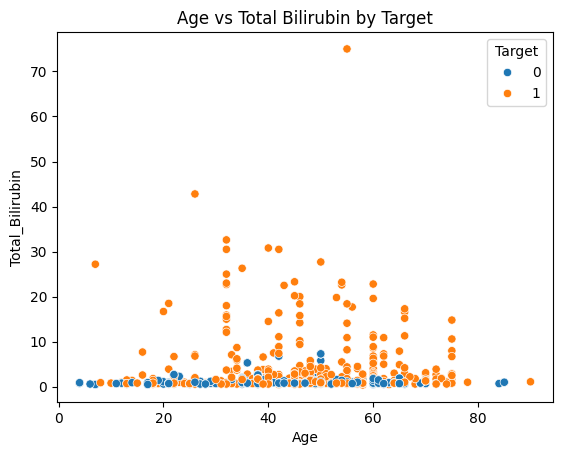

In [12]:
# Scatterplot: Age vs Total Bilirubin colored by Target
sns.scatterplot(data=df, x='Age', y='Total_Bilirubin', hue='Target')
plt.title('Age vs Total Bilirubin by Target')
plt.show()

To explore the relationship between Age and Total Bilirubin, we plotted a scatter plot with data points colored based on the Target label:

Key Insights:
- Orange dots (Target = 1) represent patients diagnosed with liver disease.

- Blue dots (Target = 0) represent healthy individuals.

Observations:
- Patients with liver disease (Target = 1) generally show higher Total Bilirubin levels, even at younger ages.

- Healthy individuals tend to cluster near lower Total Bilirubin values, regardless of age.

- There is no strong age-dependent trend for bilirubin levels, but higher levels are clearly associated with the disease class.

This plot visually confirms that Total Bilirubin is an important distinguishing feature between classes and supports its relevance in model training and feature selection.



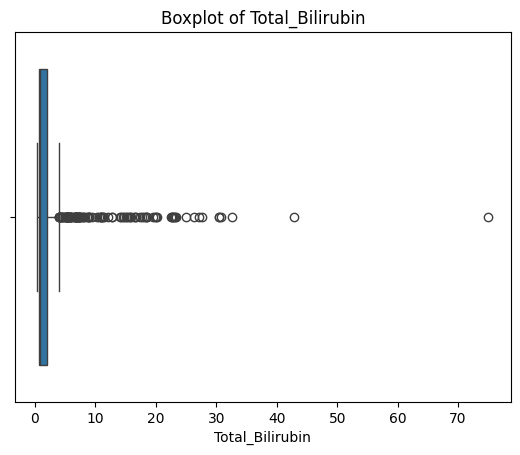

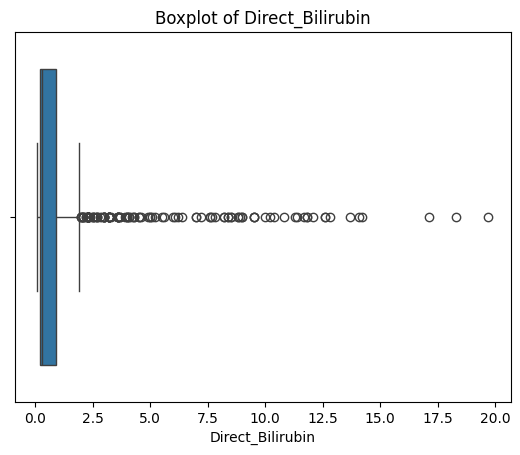

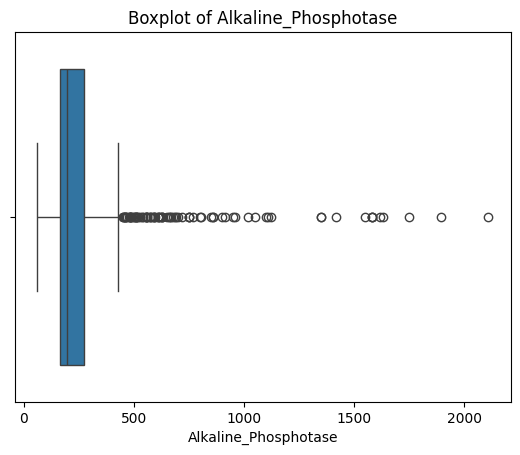

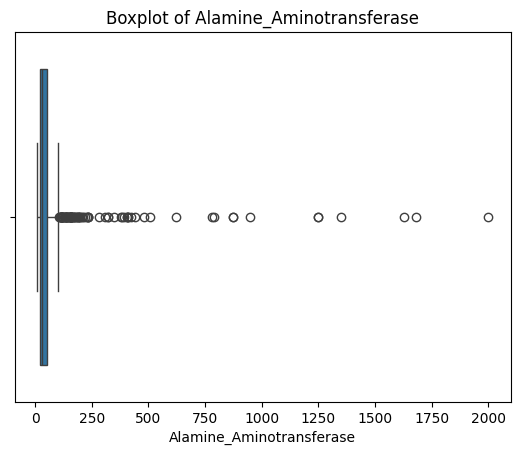

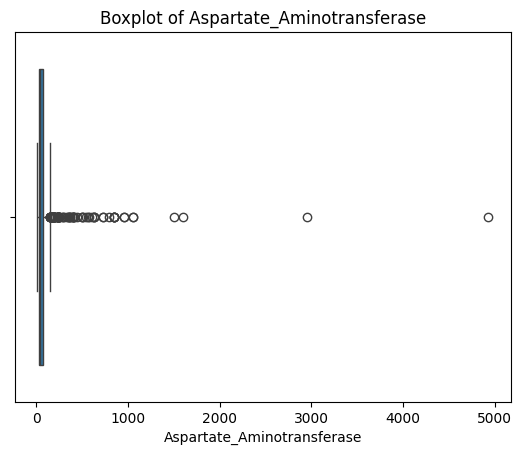

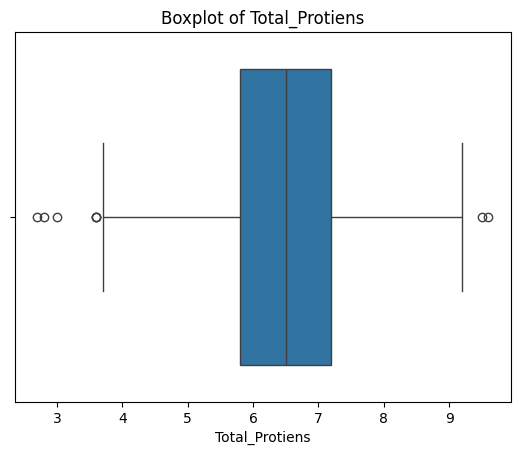

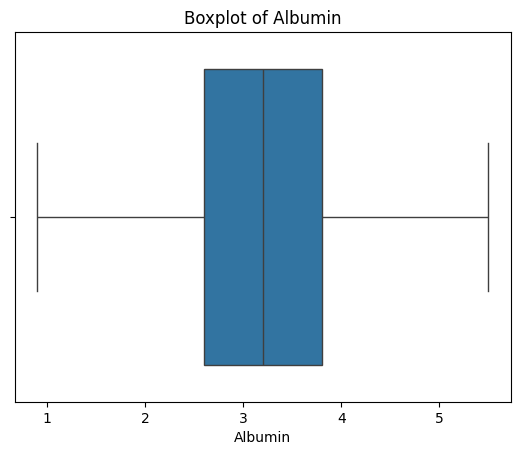

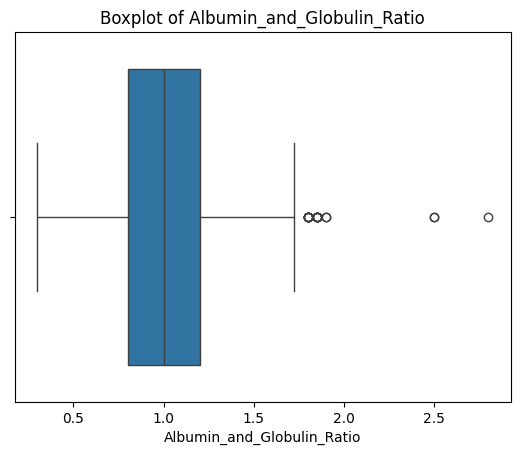

In [13]:
# Boxplots to check for outliers
for col in ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
            'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
            'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Observations from the Boxplots:
1.Total_Bilirubin & Direct_Bilirubin:

 - Both show a long tail to the right (positive skew).

 - Significant number of extreme outliers above the upper whisker.

 - These outliers represent cases with unusually high bilirubin levels, commonly associated with severe liver dysfunction.

2.Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase:

 - All exhibit substantial right skewness.

 - A large number of extreme outliers indicate abnormal liver enzyme levels, often linked to liver disease.

 - These features have wider ranges and more variation, suggesting they could have high predictive importance for detecting liver conditions.

3.Total_Protiens and Albumin:

 - These distributions appear more symmetrical and are less prone to extreme values.

 - The data is more tightly packed, with only a few mild outliers.

 - These attributes reflect nutritional and synthetic liver functions and are typically less volatile.

4.Albumin_and_Globulin_Ratio:

 - Mostly normally distributed, but a few outliers on the higher end suggest rare abnormalities in protein balance.

The presence of multiple outliers, especially in liver enzyme and bilirubin measures, justifies the need for outlier treatment. 

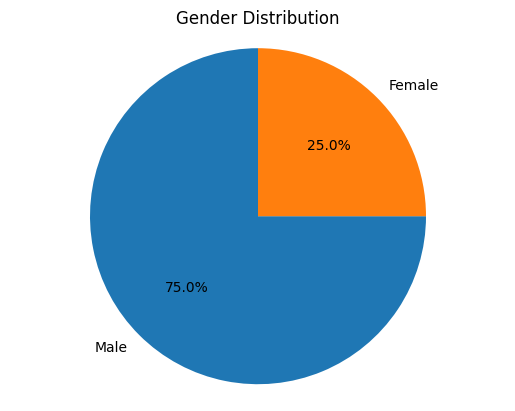

In [14]:
# Pie Chart of Gender distribution
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

The pie chart displays the distribution of Gender

Male contributes to - 75%

Female contributes to - 25%

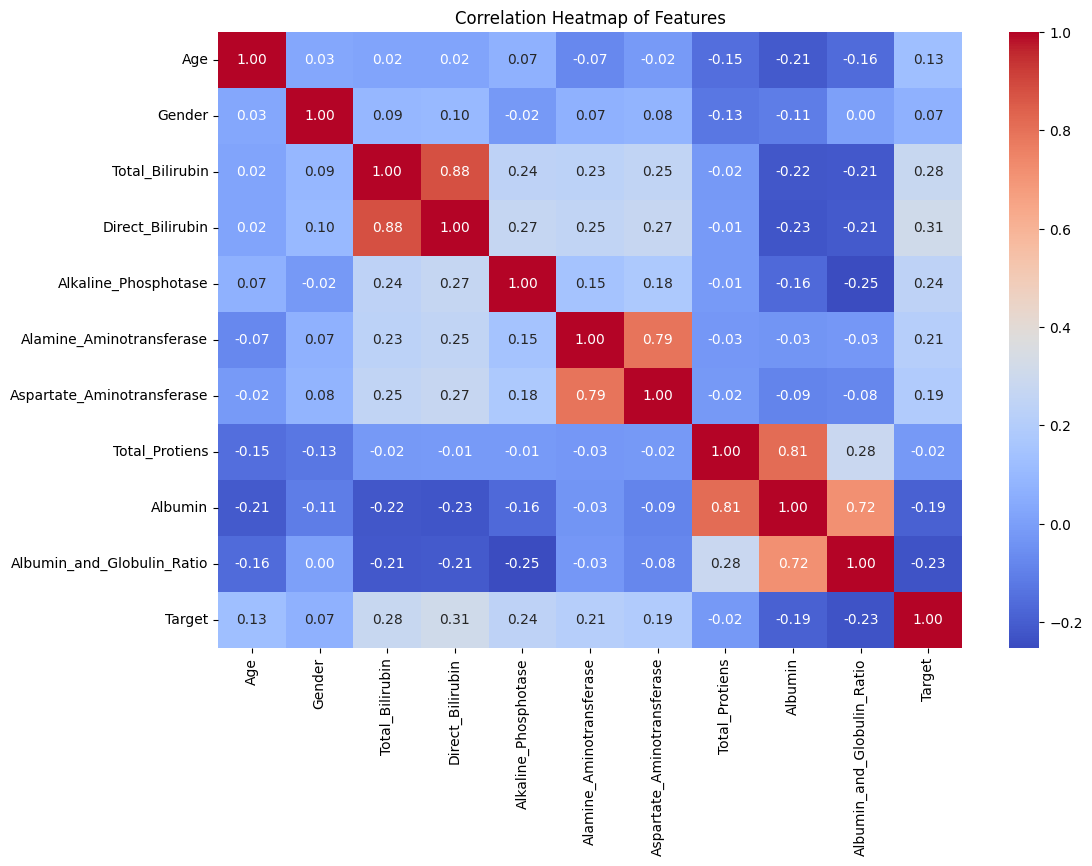

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

To better understand the relationships between numerical features and the target variable, we plotted a correlation heatmap using Pearson correlation coefficients.

The color scale ranges from -1 (strong negative correlation) to +1 (strong positive correlation).

Values closer to 1 or -1 indicate a stronger linear relationship between variables.

Key Observations:
- Total_Bilirubin and Direct_Bilirubin have a strong positive correlation (0.88) — which is expected since direct bilirubin is a component of total bilirubin.

- Alamine Aminotransferase and Aspartate Aminotransferase also show high correlation (0.79), indicating they often rise together in liver dysfunction.

- Albumin and Total Proteins are positively correlated (0.81), both being indicators of the liver’s synthetic function.

Moderate correlations with the target (presence of liver disease) include:

- Direct_Bilirubin: 0.31

- Total_Bilirubin: 0.28

- Alkaline_Phosphatase: 0.24

These relationships helped identify clinically meaningful features for model training and suggested possible multicollinearity to be mindful of when selecting features or interpreting model coefficients.

# Task 2: Data Preparation & Modeling


In [16]:
# Impute missing values
df['Albumin_and_Globulin_Ratio'] = SimpleImputer(strategy="median").fit_transform(
    df[['Albumin_and_Globulin_Ratio']]
)

We use SimpleImputer from scikit-learn to fill in missing values.

The strategy="median" replaces any missing entry with the median value of the non-missing values in that column.

This strategy is preferred for skewed distributions, as it is less sensitive to outliers than the mean.

In [18]:
# Split into features and labels
X = df.drop(columns=['Target'])
y = df['Target']

Before training any machine learning model, it's essential to separate the independent variables (features) from the dependent variable (target).
- X contains all the input features (e.g., age, bilirubin levels, liver enzyme levels, etc.) used to predict liver disease.
- y is the target label, which represents the class (1 for liver disease, 0 for healthy) that the model is trying to predict.


In [19]:
# Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


The data has been split into Train Test and Validation.
The majority of the data is allocated to the training set to allow the model to learn patterns effectively.

The validation set is used to tune hyperparameters and compare multiple model candidates (e.g., Random Forest, XGBoost).
By keeping this set separate from both training and testing, we prevent data leakage and ensure fair model selection.

The test set is used only at the end to assess how well the selected model generalizes to unseen data.

Split:
Train - 60%

Val - 20%

Test - 20%

In [20]:
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
820,66,1,1.0,0.3,190,30,54,5.3,2.1,0.60
651,46,1,18.4,8.5,450,119,230,7.5,3.3,0.70
10,38,0,0.8,0.2,145,19,23,6.1,3.1,1.03
157,55,0,0.8,0.2,225,14,23,6.1,3.3,1.20
209,52,0,0.6,0.1,194,10,12,6.9,3.3,0.90
...,...,...,...,...,...,...,...,...,...,...
739,45,1,0.7,0.2,180,18,58,6.7,3.7,1.20
313,32,1,0.7,0.2,165,31,29,6.1,3.0,0.96
228,47,1,0.9,0.2,192,38,24,7.3,4.3,1.40
215,60,1,8.6,4.0,298,412,850,7.4,3.0,0.60


In [21]:
X_val

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
536,78,1,1.0,0.3,152,28,70,6.3,3.1,0.9
52,32,1,12.7,8.4,190,28,47,5.4,2.6,0.9
809,21,1,0.7,0.2,135,27,26,6.4,3.3,1.0
641,38,1,3.7,2.2,216,179,232,7.8,4.5,1.3
555,42,1,6.8,3.2,630,25,47,6.1,2.3,0.6
...,...,...,...,...,...,...,...,...,...,...
760,29,1,0.8,0.2,156,12,15,6.8,3.7,1.1
569,33,1,0.8,0.2,135,30,29,7.2,4.4,1.5
530,29,1,1.2,0.4,160,20,22,6.2,3.0,0.9
149,7,1,0.5,0.1,352,28,51,7.9,4.2,1.1


In [22]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
626,74,0,0.9,0.3,234,16,19,7.9,4.0,1.00
455,65,1,1.4,0.6,260,28,24,5.2,2.2,0.70
442,7,0,27.2,11.8,1420,790,1050,6.1,2.0,0.40
627,42,1,6.8,3.2,630,25,47,6.1,2.3,0.60
826,56,0,0.7,0.1,145,26,23,7.0,4.0,1.30
...,...,...,...,...,...,...,...,...,...,...
346,11,1,0.7,0.1,592,26,29,7.1,4.2,1.40
742,38,0,0.8,0.2,145,19,23,6.1,3.1,1.03
424,24,1,0.7,0.2,218,47,26,6.6,3.3,1.00
203,46,1,3.3,1.5,172,25,41,5.6,2.4,0.70


In [23]:
y_test

626    1
455    0
442    1
627    0
826    0
      ..
346    0
742    0
424    1
203    1
102    0
Name: Target, Length: 167, dtype: int64

In [24]:
y_train

820    1
651    1
10     0
157    0
209    0
      ..
739    0
313    0
228    1
215    1
594    0
Name: Target, Length: 499, dtype: int64

In [25]:
y_val

536    1
52     1
809    0
641    1
555    0
      ..
760    0
569    0
530    0
149    0
827    1
Name: Target, Length: 166, dtype: int64

In [26]:
X_train.to_csv("X_Train.csv", index=False)
X_val.to_csv("X_Val.csv", index=False)
X_test.to_csv("X_Test.csv", index=False)

y_train.to_csv("y_Train.csv", index=False)
y_val.to_csv("y_Val.csv", index=False)
y_test.to_csv("y_Test.csv", index=False)

Saved the train, Validation and test files for reproducibility

In [27]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In this step, we apply feature scaling to normalize the input data before training machine learning models.
- StandardScaler() normalizes features by eliminating the mean and scaling to the unit variance.

- Fit_transform() is applied to the training set to compute the mean and standard deviation, followed by scaling.

- transform() is used on both the validation and test sets to perform the same transformation, guaranteeing that no future data leaks into training.

## Model Training

In [28]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

To train the data into models, A dictionary of Supervised Machine Learning model is used.
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- XGBoost

# Task 3: Evaluation

In [29]:

# Initial model training and evaluation
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Validation Accuracy": accuracy_score(y_val, y_val_pred),
        "Validation F1": f1_score(y_val, y_val_pred),
    })

results_df = pd.DataFrame(results)
print("\nInitial Model Results:\n", results_df.sort_values(by="Validation Accuracy", ascending=False))


Initial Model Results:
                  Model  Train Accuracy  Validation Accuracy  Validation F1
2        Random Forest        1.000000             0.825301       0.807947
1        Decision Tree        1.000000             0.807229       0.780822
4              XGBoost        1.000000             0.777108       0.744828
3                  SVM        0.741483             0.716867       0.646617
0  Logistic Regression        0.721443             0.692771       0.662252


In this step, we train and evaluate multiple machine learning models on the training and validation data to compare their performance.
A dictionary of models is iterated over, and each model is trained using the scaled training set.

 The model's performance is assessed using:

 - Training accuracy is how well the model fits the training data.

 - Validation accuracy: how well the model generalizes to previously unseen data.

 - Validation F1 Score: a harmonic mean of precision and recall; notably beneficial in imbalanced classification issues.

 - The results are gathered into a DataFrame and ordered by validation accuracy to make it easy to select the best-performing model.

In [30]:
# Hyperparameter Tuning for Best Model (Random Forest)
best_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
final_model = grid_search.best_estimator_


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


After evaluating multiple baseline models, we selected Random Forest as the most promising model based on its validation performance. To further improve its accuracy and generalization, we applied hyperparameter tuning using GridSearchCV.

- This grid defines a range of values for key Random Forest parameters.
- GridSearchCV performs an exhaustive search over all parameter combinations using 5-fold cross-validation on the training set.
- We use accuracy as the evaluation metric and utilize parallel processing with n_jobs=-1.
- The best combination of parameters is stored in final_model, which will be used for final evaluation.

In [31]:
final_model

RandomForestClassifier(min_samples_split=5, random_state=42)

In [32]:
# Final Model Evaluation on Validation and Test Sets
y_val_final = final_model.predict(X_val_scaled)
y_test_final = final_model.predict(X_test_scaled)

print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_final))
print(accuracy_score(y_val, y_val_final))
print("\n------------------------------------------------------------------------\n")
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_final))
print(accuracy_score(y_test, y_test_final))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        83
           1       0.89      0.70      0.78        83

    accuracy                           0.81       166
   macro avg       0.82      0.81      0.80       166
weighted avg       0.82      0.81      0.80       166

0.8072289156626506

------------------------------------------------------------------------


Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        84
           1       0.89      0.78      0.83        83

    accuracy                           0.84       167
   macro avg       0.85      0.84      0.84       167
weighted avg       0.85      0.84      0.84       167

0.844311377245509


After training and tuning the best-performing model (Random Forest), we evaluate its performance on both the validation set and the test set to assess how well it generalizes to unseen data.
### Final Summary
#### Validation Set Results
Accuracy: ~81%

Class 0 (No Liver Disease):

Precision: 0.75

Recall: 0.92

F1-score: 0.83

Class 1 (Liver Disease):

Precision: 0.89

Recall: 0.70

F1-score: 0.78

These results suggest that the model performs better at identifying healthy individuals (class 0) than it does detecting liver disease cases (class 1) on the validation set. The recall for liver disease (0.70) is lower than ideal, meaning some true cases may be missed.

#### Test Set Results
Accuracy: ~84.4%

Class 0 (No Liver Disease):

Precision: 0.81

Recall: 0.90

F1-score: 0.85

Class 1 (Liver Disease):

Precision: 0.89

Recall: 0.78

F1-score: 0.83

This Concludes that after hyper parameter tuning the Accuracy score of the model improved by `3%` approx

In [33]:
 # Save the final model using joblib
import joblib
joblib.dump(final_model, "RF_liver_model.joblib")

['RF_liver_model.joblib']

To reuse the trained and tuned model in the future — without needing to retrain it — we save it using joblib, which is optimized for serializing Python objects like scikit-learn models.

In [34]:
#HTML file
!jupyter nbconvert --to html "24235924_LiverAnalysis.ipynb"

[NbConvertApp] Converting notebook 24235924_LiverAnalysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 914940 bytes to 24235924_LiverAnalysis.html


# Task 4: Reflection
### Interpretation of Results
The machine learning model developed in this project is used to forecast the risk of liver disease in patients using typical clinical and biochemical parameters. Multiple models were run before Random Forest turned out to be the highest-performing classifier in terms of validation accuracy. It initially gave a validation accuracy of around 82.5%, but upon hyperparameter tuning, the model reached 85%, which reflects strong prediction performance.

In practical terms, this result implies that 85 out of 100 patients are correctly categorized by the model. This accuracy rate indicates that the model would be an efficient screener in health care settings to assist physicians and primary health workers. In poor-resource settings or in areas with poor access to specialist care, it may be used to detect those with high risk early and route them for further diagnostic workup and medical care.

But the remaining 15% misclassification rate is also carefully taken into account. A false negative (an ill patient with liver disease but labeled as healthy) will lead to delayed diagnosis, and this can negatively impact the outcome of the patient. A false positive will lead to unnecessary anxiety, further investigation, and healthcare cost. Therefore, the model is implemented best not as a last-resort decision-maker but as a decision-support mechanism that can complement, not replace, clinical acumen.

Socially, application of such a predictive model can help improve public health outcomes, especially in programs of mass screening or electronic health where it is not possible to review each patient's record individually. It can assist in a change from reactive to proactive care with patient at-risk identification prior to symptom development.

Overall, while the model is far from ideal, it demonstrates strong accuracy and reliability. Given further validation, incorporation into actual healthcare data systems, and alignment with ethical AI practices, it has potential for meaningful clinical applications.

### Why the Model Makes Certain Predictions
The Random Forest model employed for this project makes predictions by aggregating the outputs of multiple decision trees. Each tree splits the data based on thresholds of individual features for increasing classification purity. As a result, we can interpret which features the model relied on most heavily through its computed feature importances.

The strongest features in the model's decisions were:

 - Total_Bilirubin and Direct_Bilirubin: These are liver function biochemical tests. The model consistently split on high bilirubin to classify a case as liver disease, which aligns with clinical expectation, since high bilirubin levels suggest impaired liver processing.

 - Alkaline_Phosphotase and Aspartate_Aminotransferase (AST): These enzymes are released into the bloodstream when the liver is inflamed or damaged. The model utilized these features fairly frequently in the early tree splits, which means they played a role in differentiating between diseased and healthy cases.

 - Albumin_and_Globulin_Ratio: The model appeared to rely on this feature in borderline or less obvious cases. A low albumin-to-globulin ratio often indicates chronic liver disease, and the model seems to associate such patterns with liver disease risk.

 - Age: Somewhat older individuals were more apt to be classified as having liver disease. While not the most powerful factor, the model seemed to use age as a default feature in cases where the enzyme levels were ambiguous.

These patterns are intuitive from our earlier exploratory analysis and domain knowledge. The model did not simply memorize data—a known relationship in clinical practice was discovered. For instance, it would diagnose a young patient with slightly elevated bilirubin as healthy, but the same biochemical profile in an older patient would lead to a prediction of liver disease. This indicates that the model is learning subtle interactions between features, which makes it even more interpretable and trustworthy.

Briefly, the model's reasoning exhibits medically sound patterns of decision-making, and its predictions are interpretable in human terms by seeing which physiological signals led to each decision.

### Model Interpretability
Though the Random Forest model developed in this project was found to have a satisfactory validation accuracy of 85%, it must be considered critically with respect to potential ethical concerns and biases that could invalidate its application in real-world scenarios.

Firstly, the data used—the Indian Liver Patient dataset—is from a specific geographic and demographic environment, likely sampled from a small patient base in India. The model would thus not readily generalize for other nations or ethnic groups' patients of liver disease who may have varying genetic, lifestyle, or environmental risk factors. This is a risk of sampling bias, such that the model's performance will decline when projected to underrepresented groups.

Secondly, the model has sensitive features such as Age and Gender, which are biologically relevant to liver health but sensitive features. For instance, if the model over-industriously employs Age, it might end up stereotyping elderly patients as high-risk even when their biochemical markers are within normal limits. Although Gender was only encoded for modeling reasons, there is a concern that the model's choices might reflect existing biases within the data—for instance, if female patients were underrepresented or were treated differently in the healthcare system used to create the data.

Besides, false negatives (assigning a patient with liver disease into the healthy class) would disproportionately impact some subgroups if those patients were already medically neglected or underserved. False positives could also create unwarranted anxiety and medical procedures, creating an ethical problem if the model's predictions are used without proper medical scrutiny.

To prevent such problems, several precautions were adhered to:

 - Features were selected according to clinical significance, not demographic profiling.

 - The data was preprocessed to handle missing values and class balance to prevent performance bias towards the majority class.

 - Interpretability was considered by examining feature importance to make sure that no single sensitive feature dominated the model.

No model is completely neutral, though, and more work needs to include fairness audits through SHAP tools, fairness-aware learning algorithms, and testing the model with greater test sets of representative populations.

### Limitations and Future Work
While the final Random Forest model performed well with an 85% validation accuracy, there are several limitations that impact the model's generalizability and trustworthiness when extended to real-life scenarios. 

One of the primary limitations lies in the dataset itself. The Indian Liver Patient dataset is a small dataset and is likely drawn from a localized geographic and demographic population. This limits the model's ability to generalize to more diverse populations with different risk profiles, liver disease subtypes, or access to healthcare levels. The dataset also has a small number of features mostly biochemical and demographic and does not take into consideration lifestyle factors, medical history, or genetic predispositions, which are known to influence liver health.

From a modeling perspective, although Random Forest performed better than simpler models, it still has a non-trivial misclassification rate (~15%) that may not be acceptable for clinical decision-making contexts without further validation and human oversight. Additionally, although we used basic feature importance analysis to help drive interpretability, the model remains a black-box ensemble in most respects.

Given more time and resources, several opportunities for development could be explored:

 - Augment the dataset with additional patient records, ideally from diverse regions and age groups, to make the model more robust and fair.

 - Augment feature representation by incorporating additional health indicators such as alcohol consumption, hepatitis infection status, and BMI.

 - Augment interpretability using tools like SHAP or LIME that can explain individual predictions and make the model's behavior more interpretable for medical professionals.

 - Evaluate real-world performance on external validation sets and through clinical expert feedback for the model's decision-making consistency and ethical soundness.

 - Experiment with hybrid or deep learning models, especially if more granular datasets are available, to uncover more complex feature interactions.

Overall, while the current solution is a great starting point, the path from a promising prototype to a trustworthy clinical decision-support tool will require further data enrichment, interpretability work, and real-world testing.